In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from PIL import Image
from sklearn import preprocessing
# from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization

D_df = pd.read_csv("D-Tyrosine_all_cutWaveNo.csv")
L_df = pd.read_csv("L-(-)-Tyrosine_allCutWaveNo.csv")

In [2]:
# print(cereal_df)
X_D = D_df.to_numpy()
X_D = np.transpose(X_D)

X_L = L_df.to_numpy()
X_L = np.transpose(X_L)

wave_numbers_D = X_D[1, :]
wave_numbers_L = X_L[1, :]

intensities_D = X_D[2:, :]
intensities_L = X_L[2:, :]

wave_numbers = wave_numbers_D # or wave_numbers_L

In [3]:
X_arrall = np.vstack([intensities_D, intensities_L])
y_arrall = np.transpose(np.hstack([np.zeros(intensities_D.shape[0]), np.ones(intensities_L.shape[0])]))

In [4]:
X_arrall

array([[ 1.42139,  1.42504,  1.42339, ..., -0.51904, -0.53019, -0.19653],
       [ 1.39645,  1.38976,  1.39146, ..., -0.52127, -0.61835, -0.17288],
       [ 1.48092,  1.48074,  1.48422, ..., -0.45658, -0.48356, -0.1088 ],
       ...,
       [ 1.54234,  1.54231,  1.54045, ..., -0.46193, -0.45717, -0.10908],
       [ 1.57082,  1.56969,  1.56272, ..., -0.48045, -0.44606, -0.08191],
       [ 1.60106,  1.60178,  1.58886, ..., -0.49654, -0.46704, -0.09735]])

In [5]:
X_arrall.shape

(235, 1658)

In [6]:
y_arrall

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [7]:
y_arrall.shape

(235,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_arrall, y_arrall, test_size = 0.2, random_state = 42)

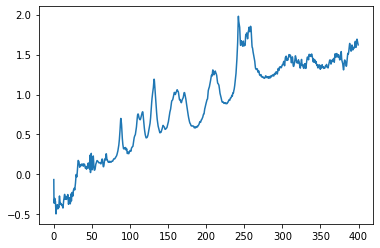

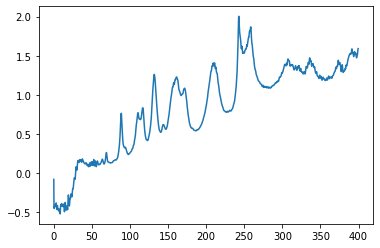

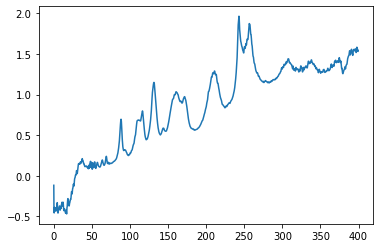

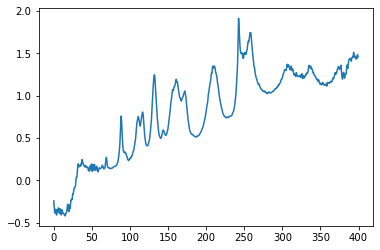

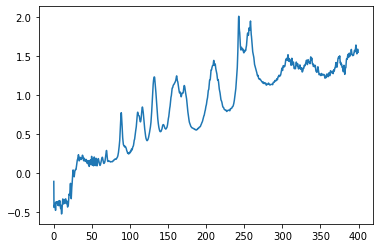

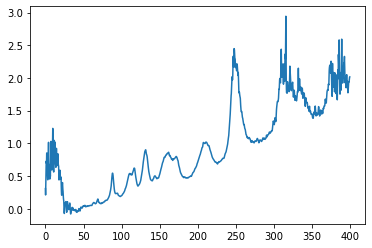

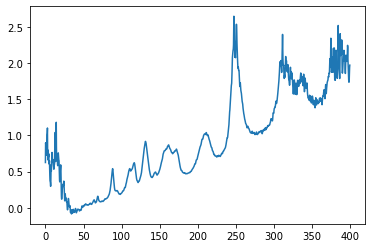

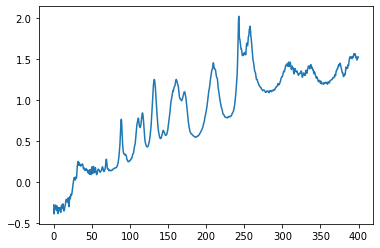

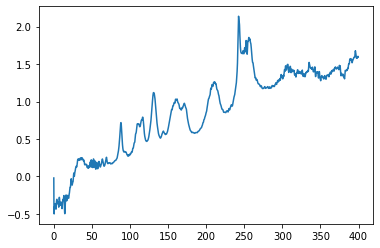

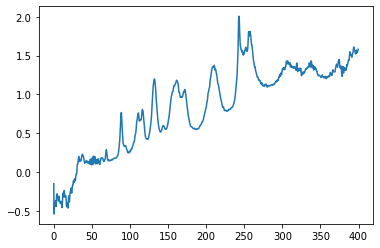

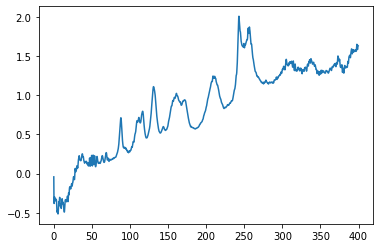

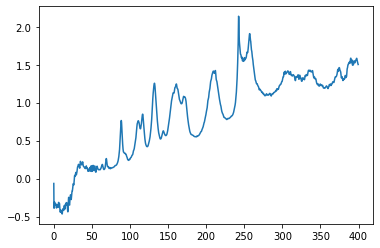

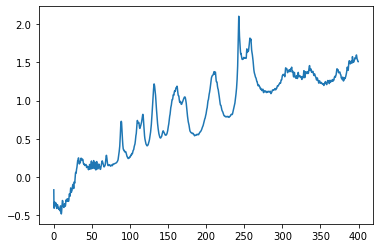

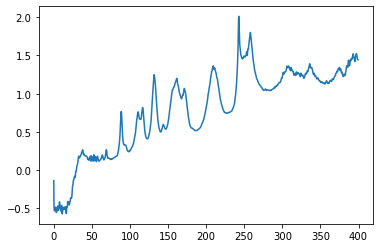

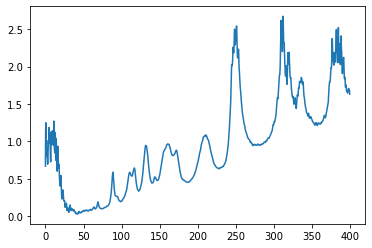

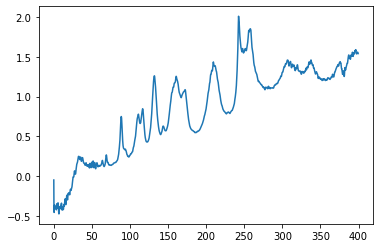

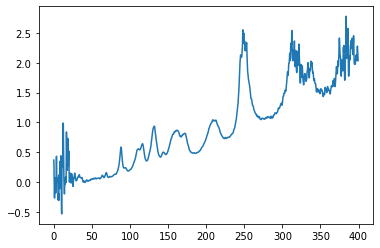

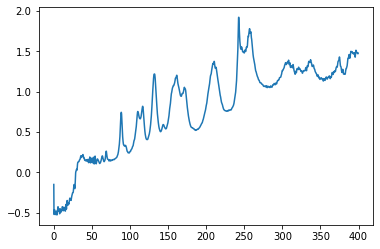

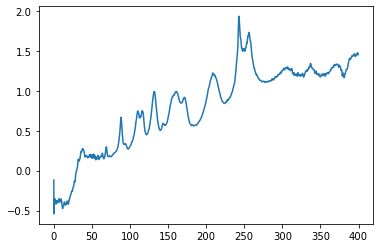

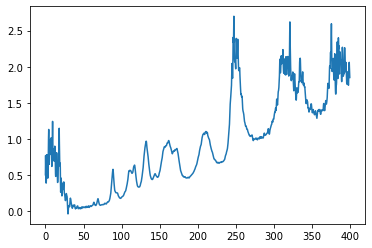

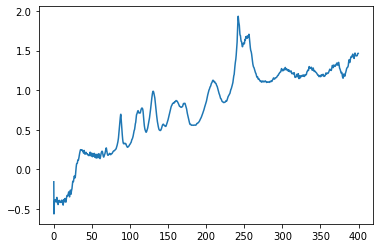

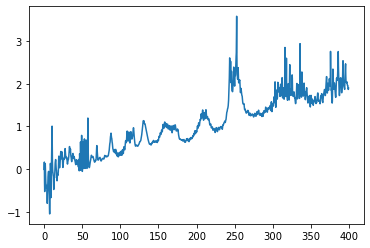

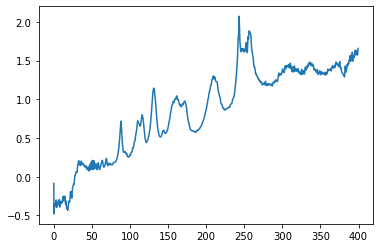

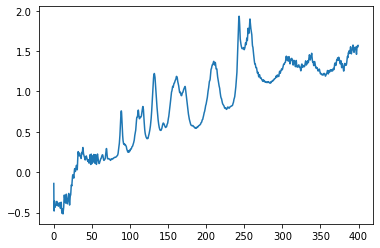

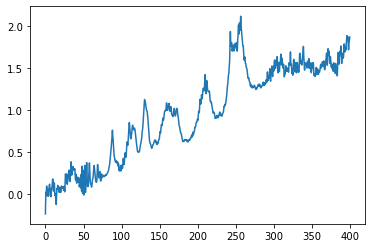

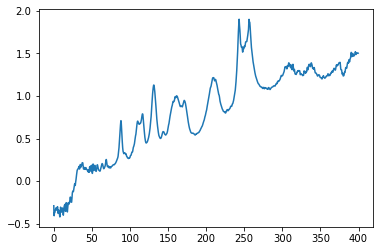

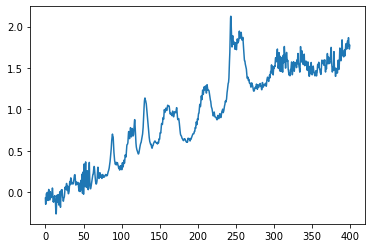

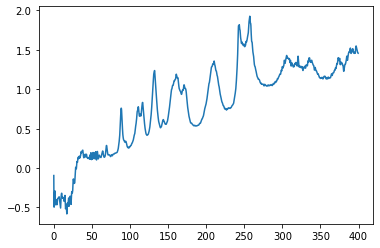

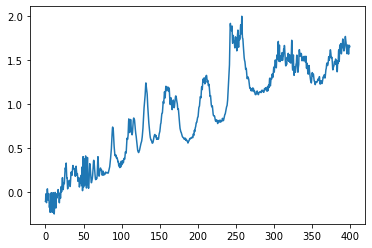

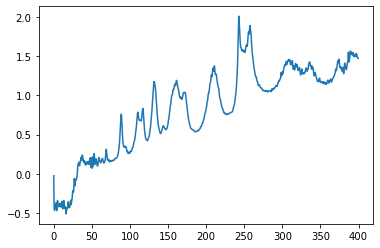

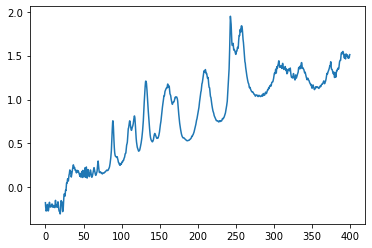

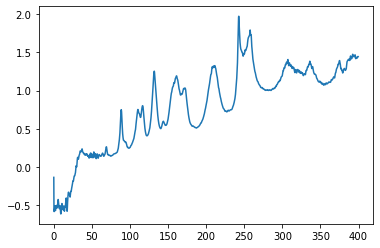

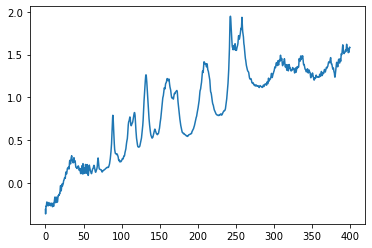

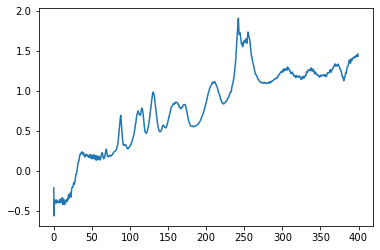

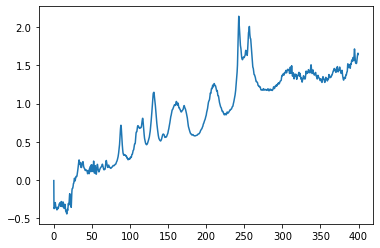

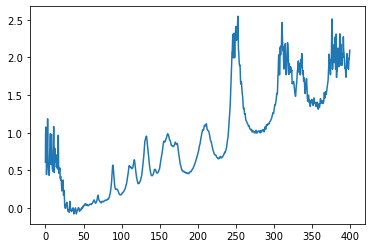

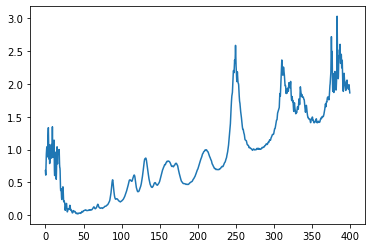

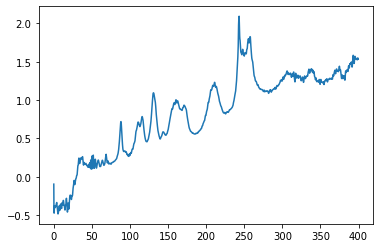

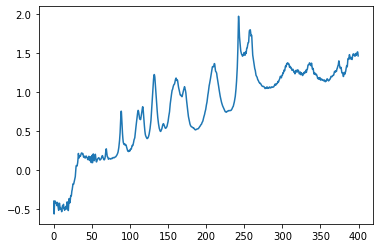

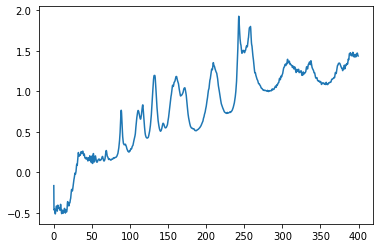

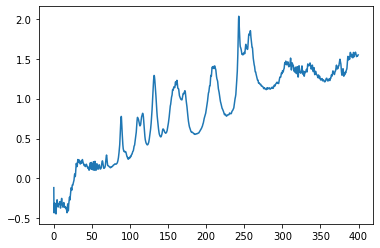

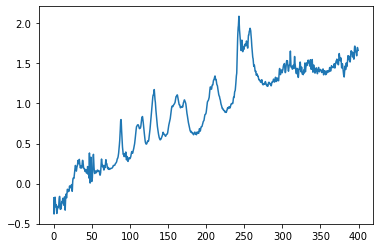

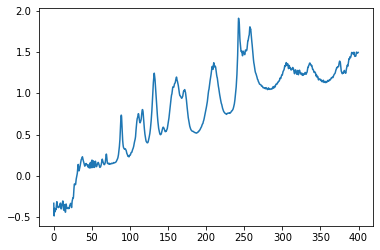

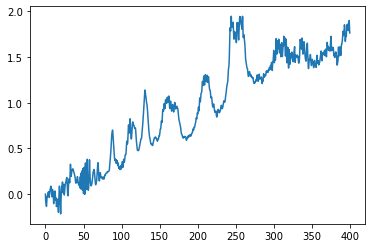

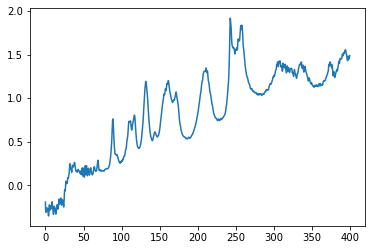

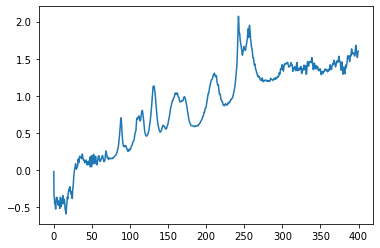

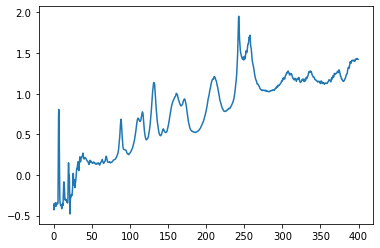

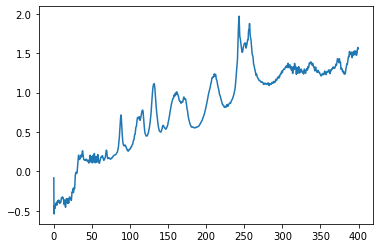

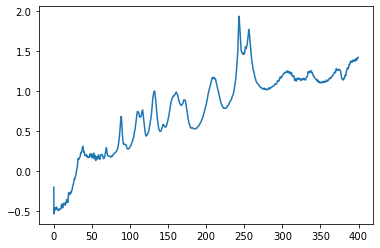

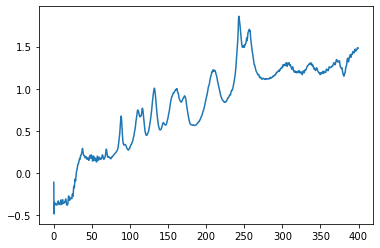

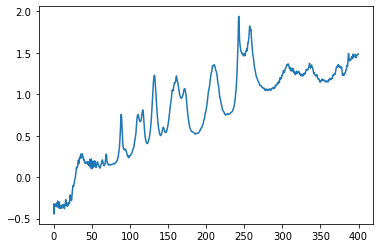

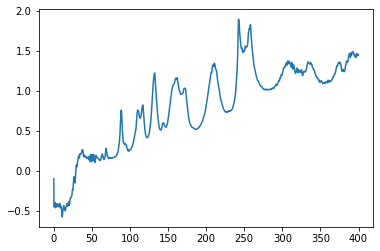

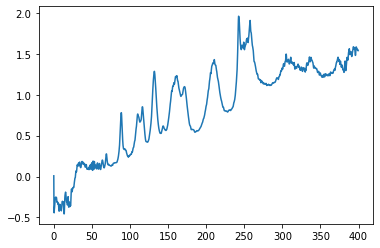

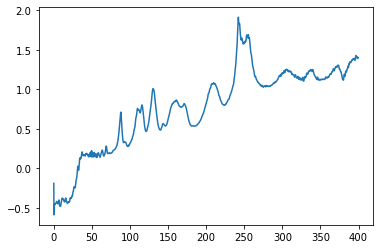

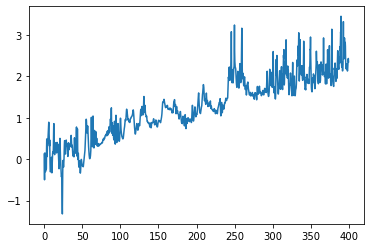

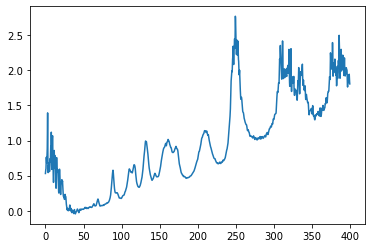

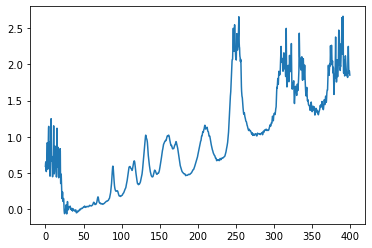

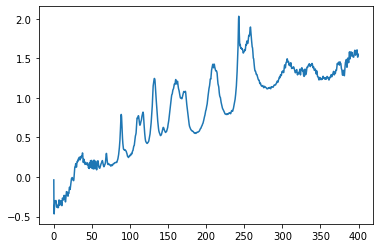

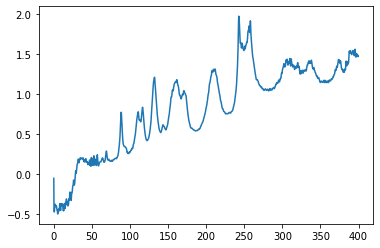

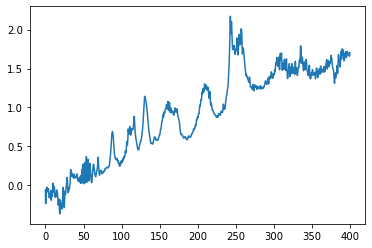

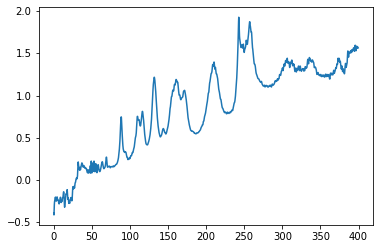

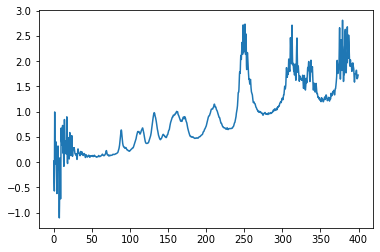

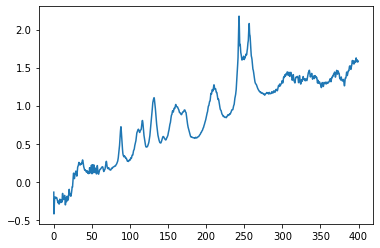

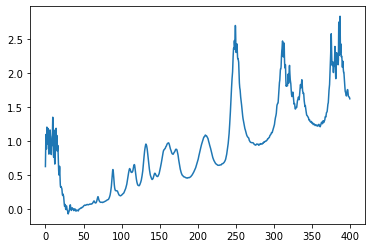

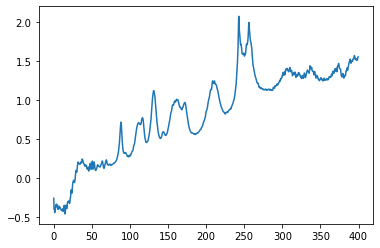

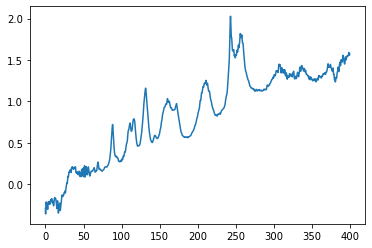

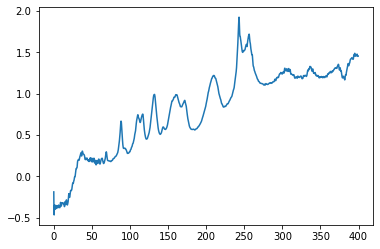

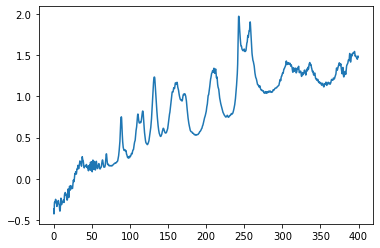

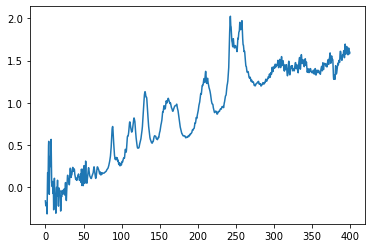

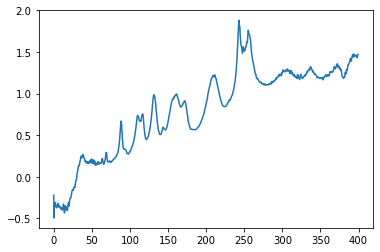

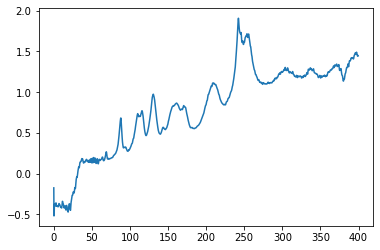

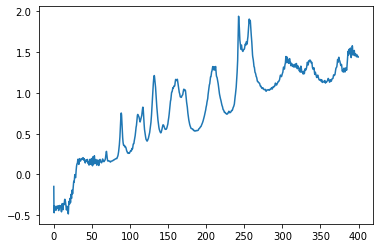

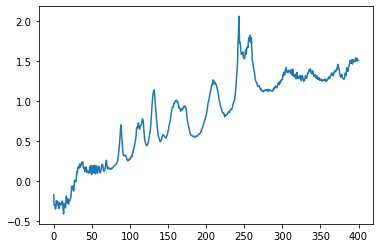

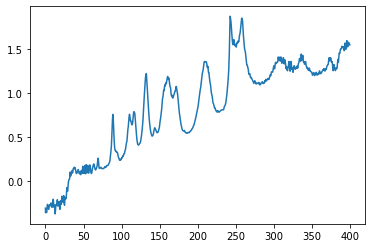

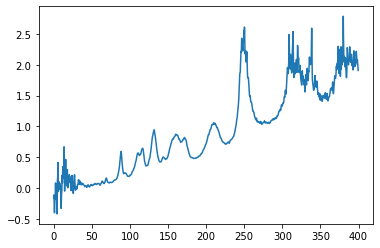

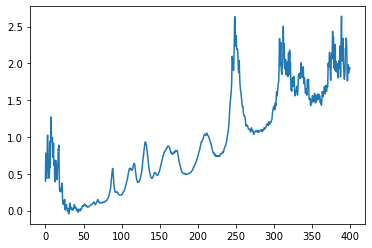

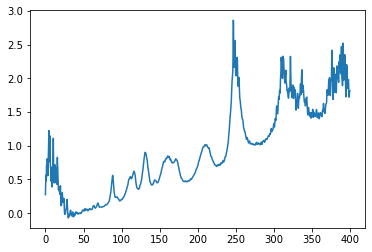

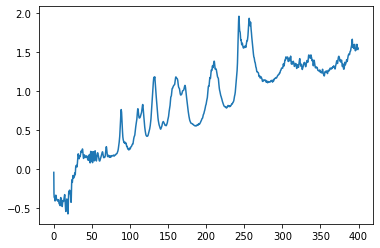

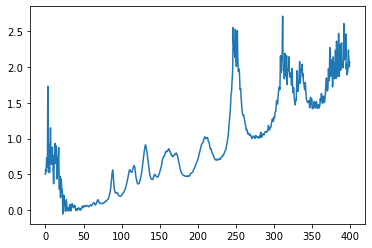

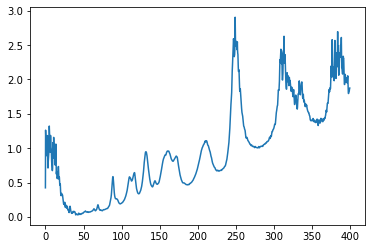

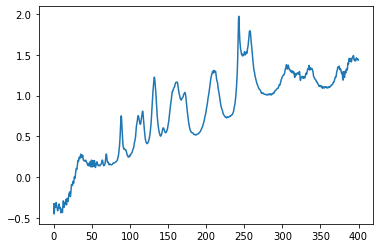

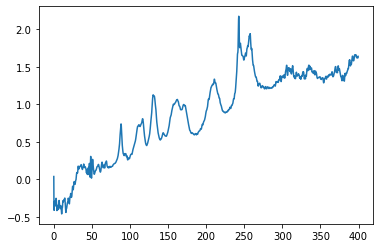

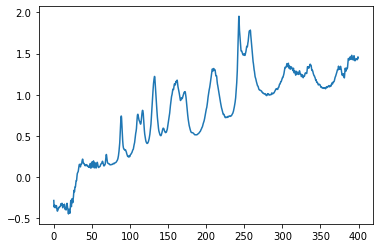

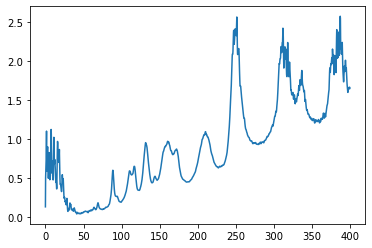

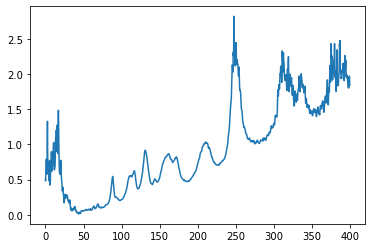

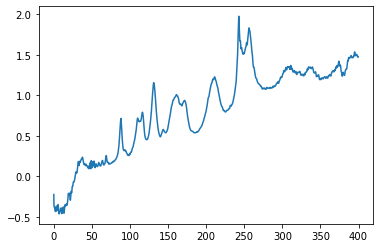

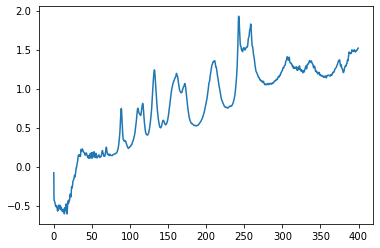

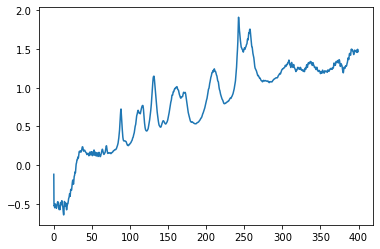

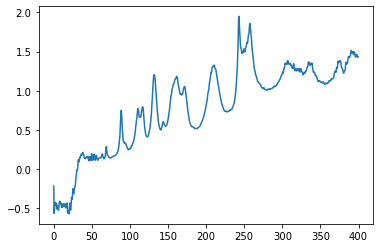

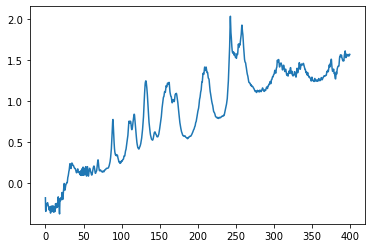

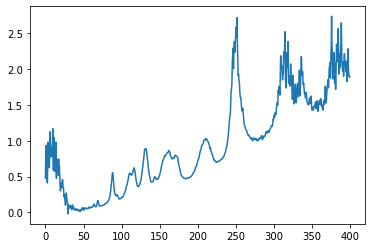

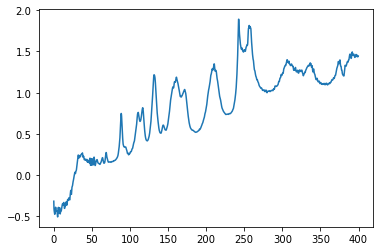

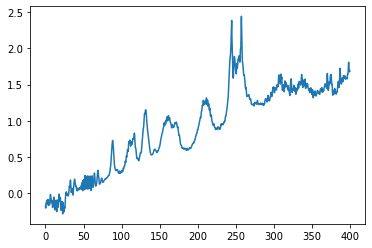

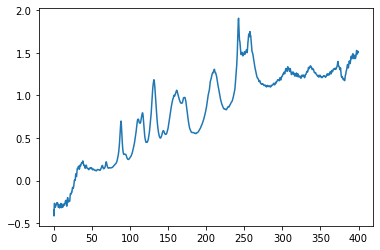

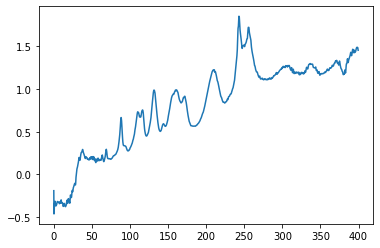

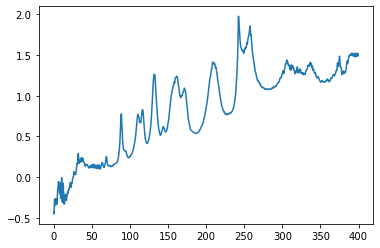

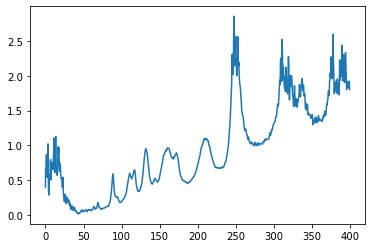

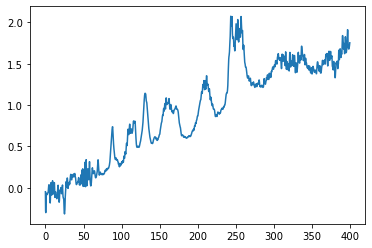

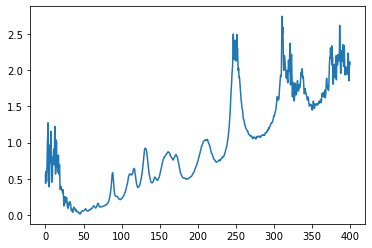

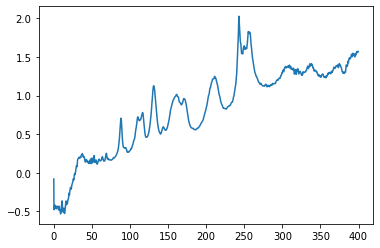

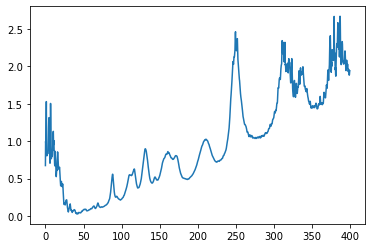

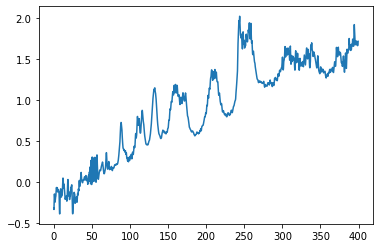

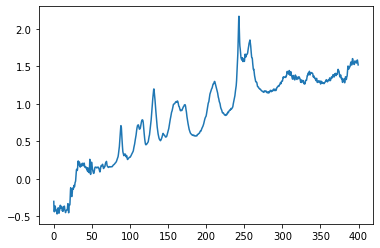

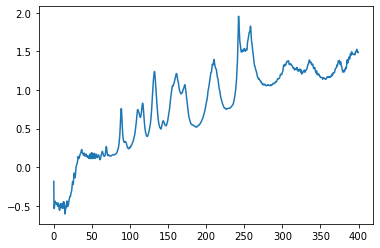

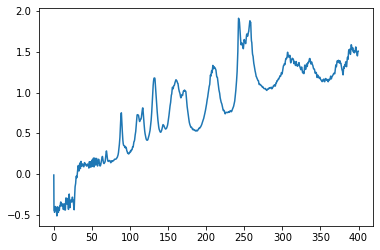

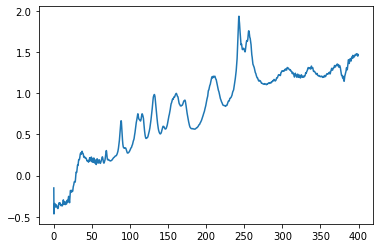

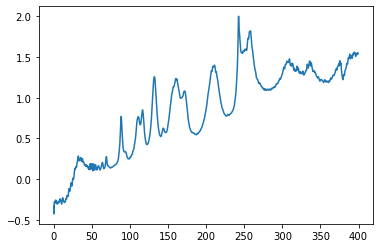

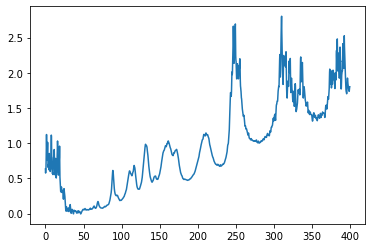

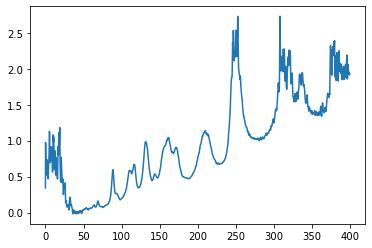

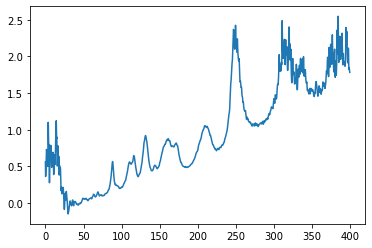

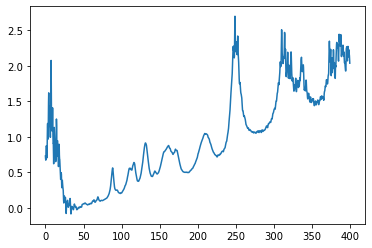

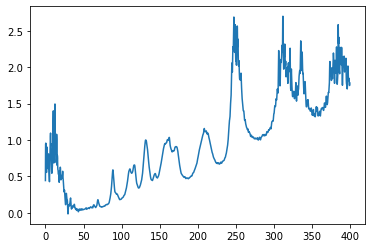

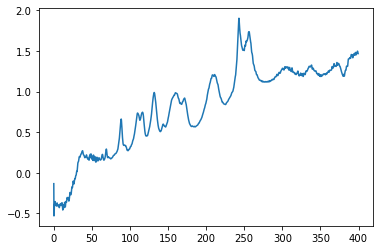

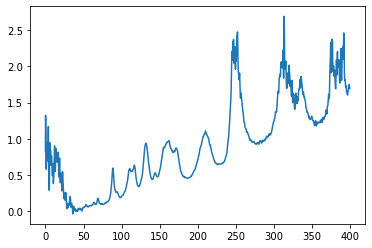

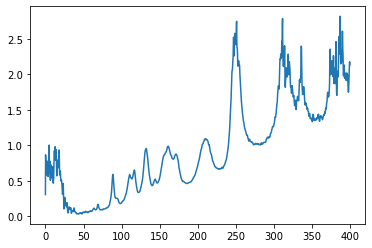

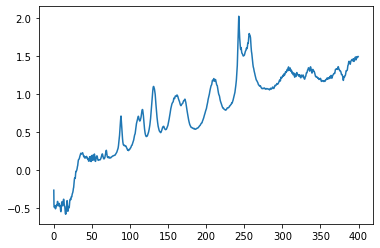

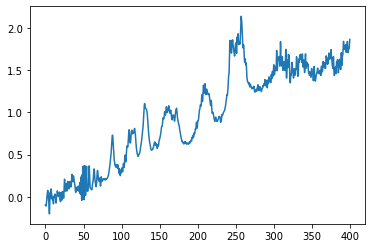

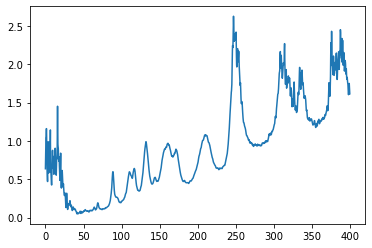

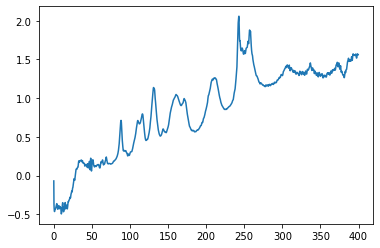

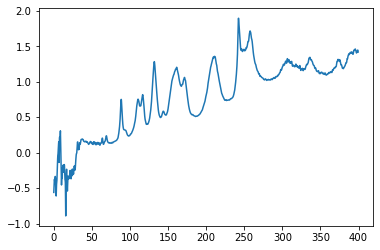

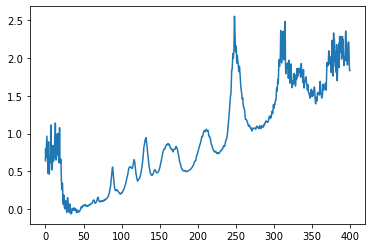

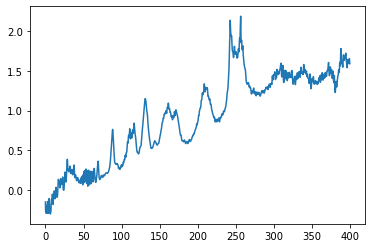

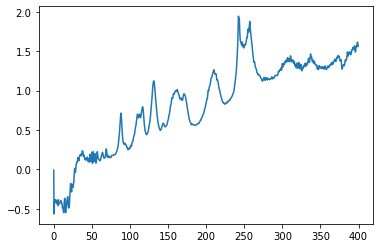

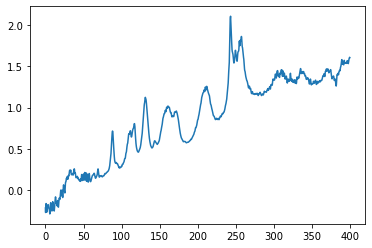

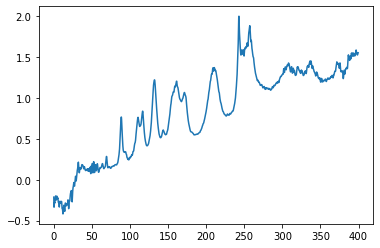

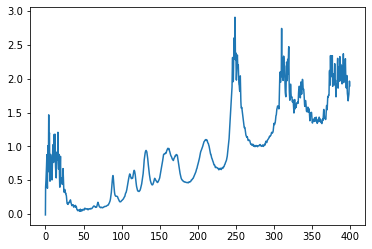

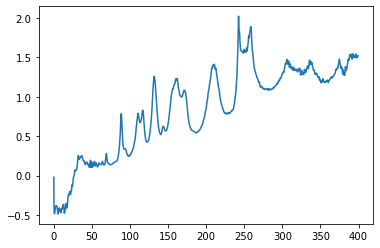

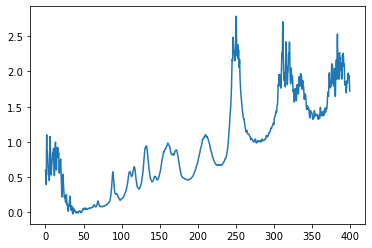

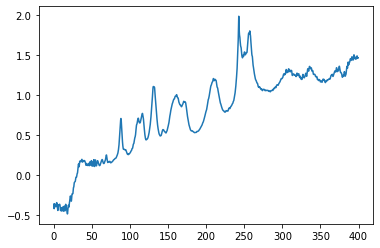

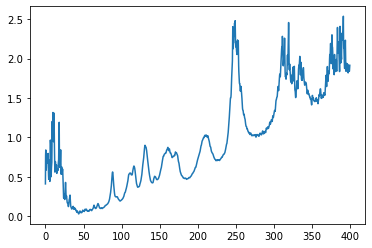

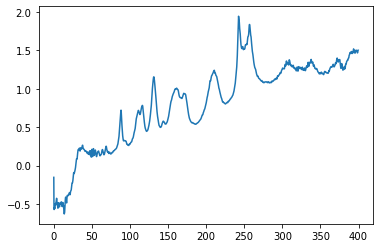

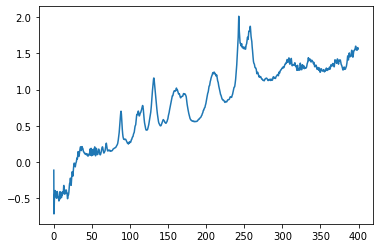

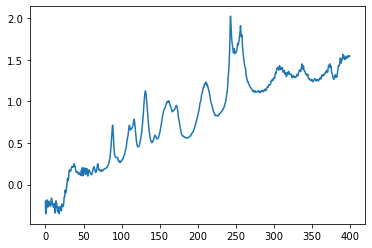

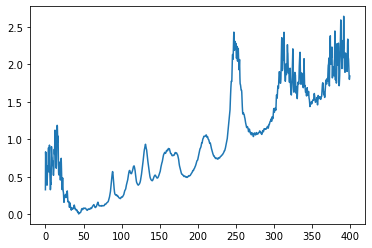

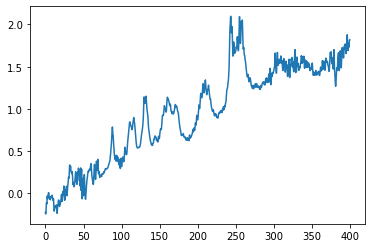

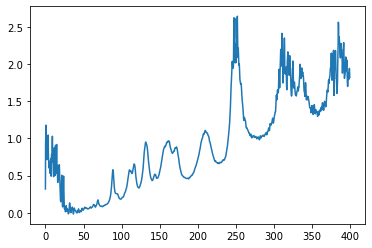

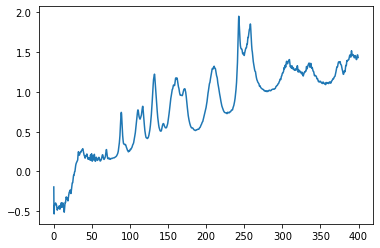

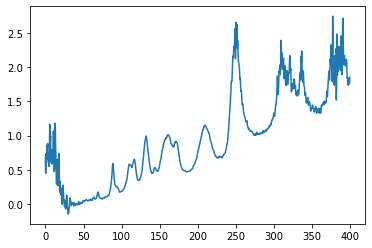

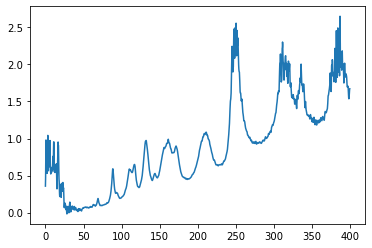

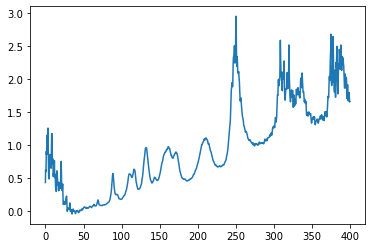

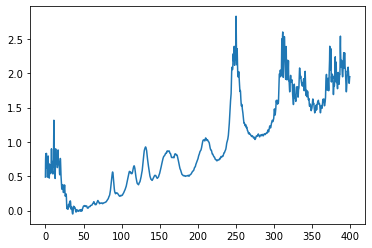

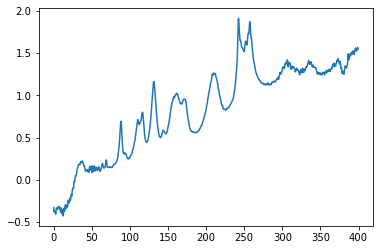

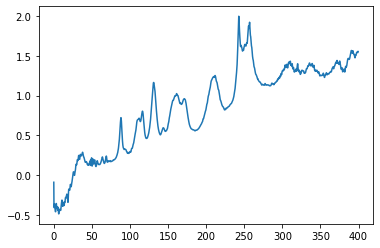

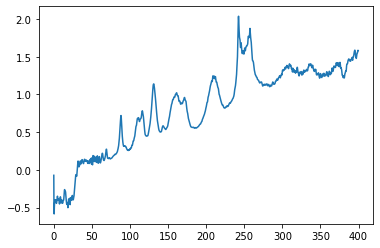

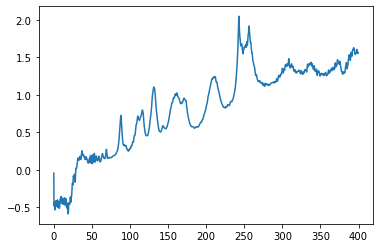

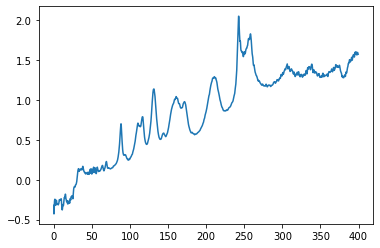

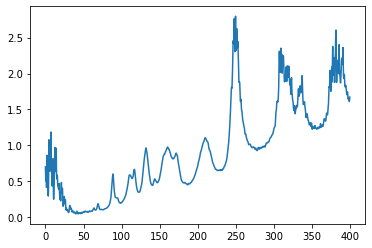

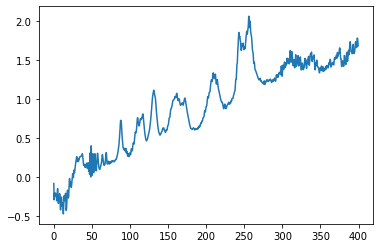

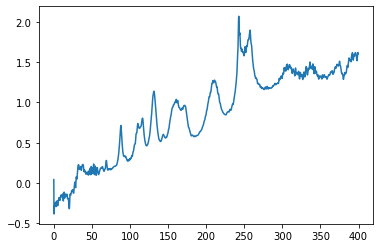

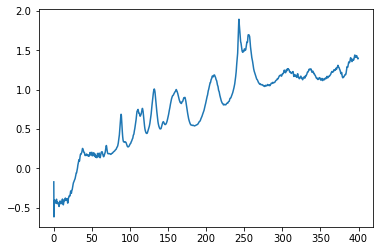

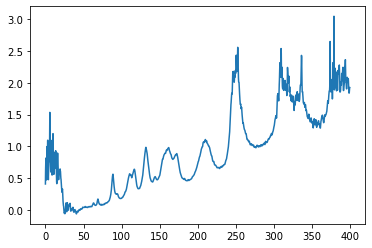

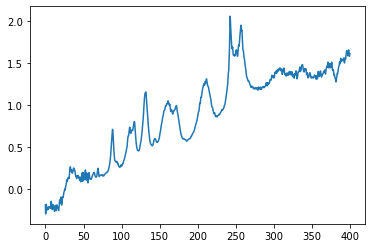

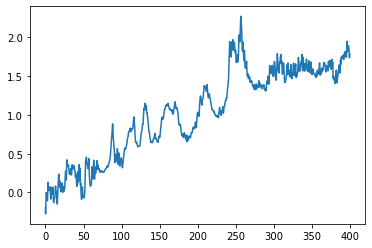

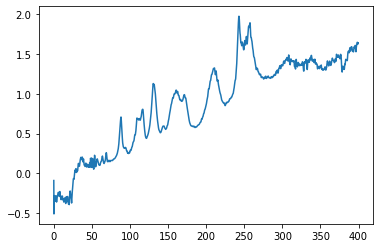

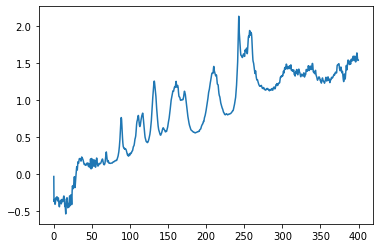

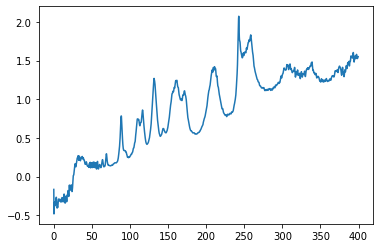

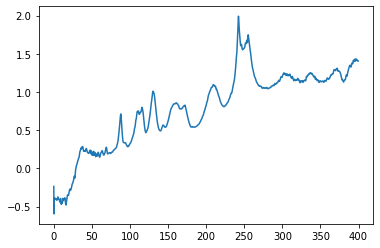

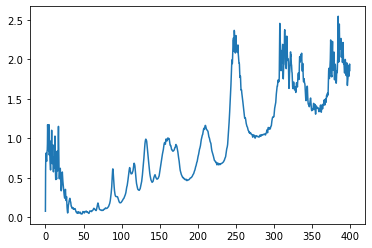

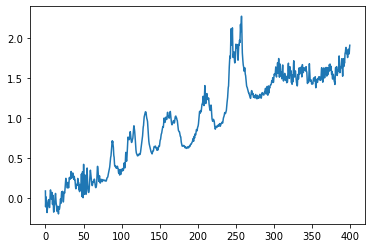

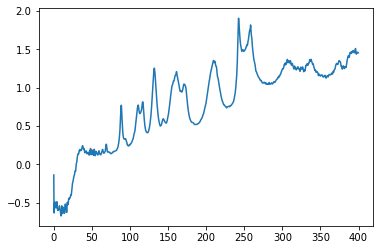

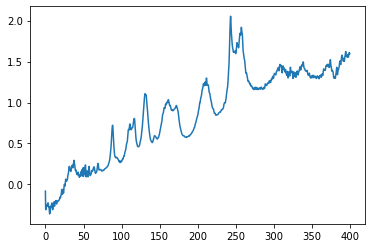

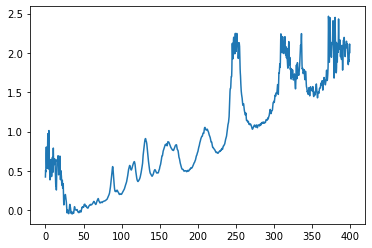

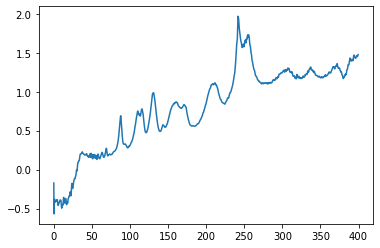

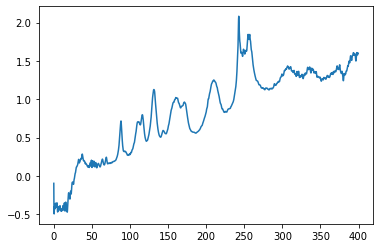

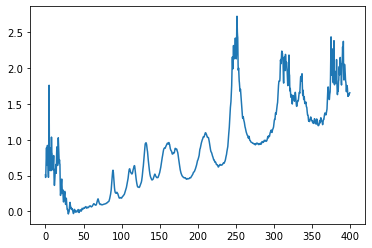

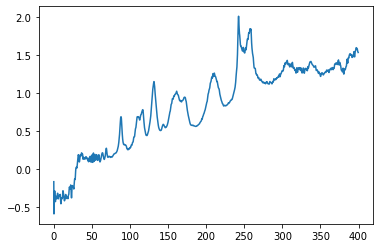

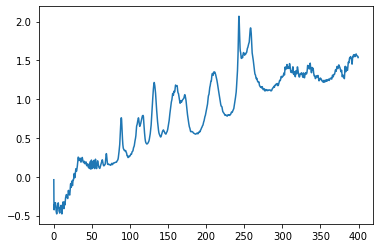

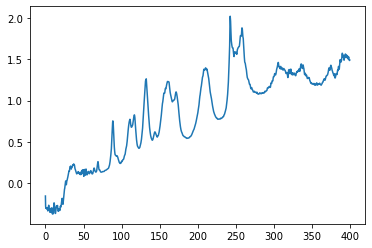

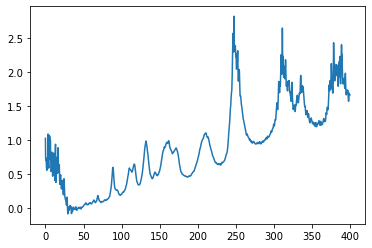

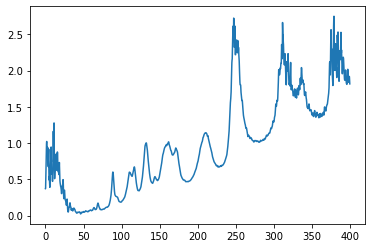

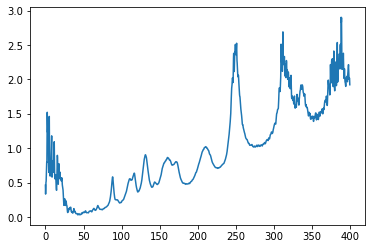

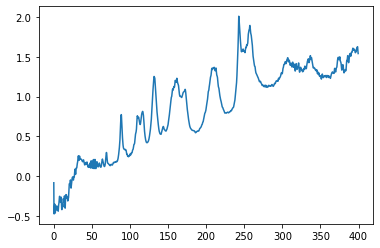

In [17]:
for i in range(X_train.shape[0]):
    plt.plot(wave_numbers, X_train[i, :])
    plt.show()

In [41]:
model_Random = RandomForestClassifier()
model_Random.fit(X_train, y_train)

model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train, y_train)

y_pred_Tree = model_Tree.predict(X_test)
y_pred_Random =model_Random.predict(X_test)
accuracyTree = accuracy_score(y_test, y_pred_Tree)
accuracyRandom = accuracy_score(y_test, y_pred_Random)

print('accuracy_DecisionTreeClassifier :',"{:.2%}".format(accuracyTree))
print('accuracy_RandomForestClassifier : ',"{:.2%}".format(accuracyRandom))

accuracy_DecisionTreeClassifier : 95.74%
accuracy_RandomForestClassifier :  100.00%


In [11]:
model = RidgeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('accuracy_Ride :',"{:.2%}".format(accuracy))

accuracy_Ride : 100.00%


In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('accuracy_Ride :',"{:.2%}".format(accuracy))

accuracy_Ride : 82.98%


In [13]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('accuracy_Ride :',"{:.2%}".format(accuracy))

accuracy_Ride : 100.00%


In [15]:
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('accuracy_Ride :',"{:.2%}".format(accuracy))

accuracy_Ride : 93.62%


In [14]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('accuracy_Ride :',"{:.2%}".format(accuracy))

accuracy_Ride : 100.00%


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('accuracy_Ride :',"{:.2%}".format(accuracy))

accuracy_Ride : 100.00%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
model_SGD = SGDClassifier()
model_KN = KNeighborsClassifier()
model_Tree = DecisionTreeClassifier()
model_Random = RandomForestClassifier()

model_SGD.fit(X_train, y_train)
model_KN.fit(X_train,y_train)
model_Tree.fit(X_train,y_train)
model_Random.fit(X_train,y_train)

y_pred_SGD = model_SGD.predict(X_test)
y_pred_KN = model_KN.predict(X_test)
y_pred_Tree = model_Tree.predict(X_test)
y_pred_Random =model_Random.predict(X_test)

accuracySGD = accuracy_score(y_test, y_pred_SGD)
accuracyKN =accuracy_score(y_test,y_pred_KN)
accuracyTree = accuracy_score(y_test,y_pred_Tree)
accuracyRandom = accuracy_score(y_test,y_pred_Random)

print('accuracy_SGD :',"{:.2%}".format(accuracySGD))
print('accuracy_KNeighborsClassifier :',"{:.2%}".format(accuracyKN))
print('accuracy_DecisionTreeClassifier :',"{:.2%}".format(accuracyTree))
print('accuracy_RandomForestClassifier : ',"{:.2%}".format(accuracyRandom))

accuracy_SGD : 76.60%
accuracy_KNeighborsClassifier : 97.87%
accuracy_DecisionTreeClassifier : 100.00%
accuracy_RandomForestClassifier :  100.00%


In [22]:
model_SGD = SGDClassifier()
model_KN = KNeighborsClassifier()
model_Tree = DecisionTreeClassifier()
model_Random = RandomForestClassifier()

model_SGD.fit(X_train, y_train)
model_KN.fit(X_train,y_train)
model_Tree.fit(X_train,y_train)
model_Random.fit(X_train,y_train)

y_pred_SGD = model_SGD.predict(X_test)
y_pred_KN = model_KN.predict(X_test)
y_pred_Tree = model_Tree.predict(X_test)
y_pred_Random =model_Random.predict(X_test)

accuracySGD = accuracy_score(y_test, y_pred_SGD)
accuracyKN =accuracy_score(y_test,y_pred_KN)
accuracyTree = accuracy_score(y_test,y_pred_Tree)
accuracyRandom = accuracy_score(y_test,y_pred_Random)

print('accuracy_SGD :',"{:.2%}".format(accuracySGD))
print('accuracy_KNeighborsClassifier :',"{:.2%}".format(accuracyKN))
print('accuracy_DecisionTreeClassifier :',"{:.2%}".format(accuracyTree))
print('accuracy_RandomForestClassifier : ',"{:.2%}".format(accuracyRandom))

accuracy_SGD : 91.49%
accuracy_KNeighborsClassifier : 97.87%
accuracy_DecisionTreeClassifier : 100.00%
accuracy_RandomForestClassifier :  100.00%


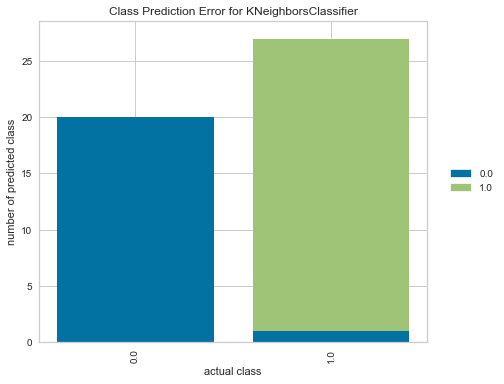

In [38]:
visualizer = class_prediction_error(model_KN, X_train, y_train, X_test, y_test)

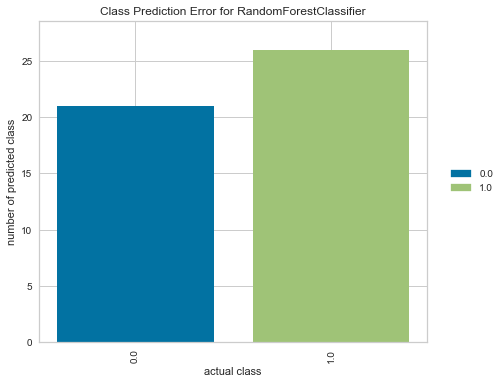

In [39]:
visualizer = class_prediction_error(model_Random, X_train, y_train, X_test, y_test)

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Conv1D,MaxPooling1D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from keras.utils import np_utils

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [39]:
model1 = Sequential()
model1.add(Dense(2048, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(16,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dense(2,activation='softmax'))
model1.compile(loss='binary_crossentropy', 
         optimizer='adam',metrics=['accuracy'])        

In [40]:
history1 = model1.fit(X_train,y_train, batch_size = 1000, epochs = 2000,verbose=1,validation_data=(X_val,y_val))

Epoch 1/2000
1/1 [==============================] - 0s 319ms/step - loss: 1.1566 - accuracy: 0.5106 - val_loss: 0.9879 - val_accuracy: 0.5106
Epoch 2/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.2118 - accuracy: 0.2624 - val_loss: 0.9376 - val_accuracy: 0.5106
Epoch 3/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.8375 - accuracy: 0.5532 - val_loss: 0.9065 - val_accuracy: 0.5106
Epoch 4/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.7391 - accuracy: 0.5106 - val_loss: 0.9151 - val_accuracy: 0.5106
Epoch 5/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.7111 - accuracy: 0.4326 - val_loss: 0.9246 - val_accuracy: 0.5106
Epoch 6/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.7034 - accuracy: 0.6312 - val_loss: 0.9248 - val_accuracy: 0.5106
Epoch 7/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6987 - accuracy: 0.3759 - val_loss: 0.9168 - val_accuracy: 0.5106
Epoch 8/2000

1/1 [==============================] - 0s 25ms/step - loss: 0.6932 - accuracy: 0.5248 - val_loss: 0.7137 - val_accuracy: 0.5106
Epoch 59/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5248 - val_loss: 0.7129 - val_accuracy: 0.5106
Epoch 60/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5248 - val_loss: 0.7121 - val_accuracy: 0.5106
Epoch 61/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6932 - accuracy: 0.5390 - val_loss: 0.7111 - val_accuracy: 0.5106
Epoch 62/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6932 - accuracy: 0.5319 - val_loss: 0.7102 - val_accuracy: 0.5106
Epoch 63/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6932 - accuracy: 0.5319 - val_loss: 0.7095 - val_accuracy: 0.4894
Epoch 64/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6932 - accuracy: 0.5603 - val_loss: 0.7090 - val_accuracy: 0.4894
Epoch 65/2000
1/1 [=

Epoch 116/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.7524 - val_accuracy: 0.2979
Epoch 117/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.7557 - val_accuracy: 0.3191
Epoch 118/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.7591 - val_accuracy: 0.3617
Epoch 119/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.7624 - val_accuracy: 0.3830
Epoch 120/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.5177 - val_loss: 0.7655 - val_accuracy: 0.3830
Epoch 121/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.7684 - val_accuracy: 0.3830
Epoch 122/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6932 - accuracy: 0.5461 - val_loss: 0.7713 - val_accuracy: 0.3830

1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.7687 - val_accuracy: 0.5532
Epoch 174/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.7670 - val_accuracy: 0.5532
Epoch 175/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.7653 - val_accuracy: 0.5532
Epoch 176/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.7638 - val_accuracy: 0.5532
Epoch 177/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.7623 - val_accuracy: 0.5532
Epoch 178/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4894 - val_loss: 0.7609 - val_accuracy: 0.5532
Epoch 179/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.7595 - val_accuracy: 0.5532
Epoch 180/2000

1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.7160 - val_accuracy: 0.4894
Epoch 231/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.7155 - val_accuracy: 0.4894
Epoch 232/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.7151 - val_accuracy: 0.4894
Epoch 233/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.5532 - val_loss: 0.7146 - val_accuracy: 0.4894
Epoch 234/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.7142 - val_accuracy: 0.4894
Epoch 235/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.7137 - val_accuracy: 0.4894
Epoch 236/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.7133 - val_accuracy: 0.4894
Epoch 237/2000

1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.7007 - val_accuracy: 0.3830
Epoch 288/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.7006 - val_accuracy: 0.3617
Epoch 289/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4894 - val_loss: 0.7004 - val_accuracy: 0.3830
Epoch 290/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.7003 - val_accuracy: 0.3830
Epoch 291/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.7001 - val_accuracy: 0.3617
Epoch 292/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.7000 - val_accuracy: 0.3830
Epoch 293/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.6999 - val_accuracy: 0.3830
Epoch 294/2000

1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.7005 - val_accuracy: 0.5319
Epoch 345/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.7004 - val_accuracy: 0.5106
Epoch 346/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.6931 - accuracy: 0.4681 - val_loss: 0.7003 - val_accuracy: 0.5106
Epoch 347/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.6931 - accuracy: 0.5532 - val_loss: 0.7002 - val_accuracy: 0.5106
Epoch 348/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.7001 - val_accuracy: 0.5106
Epoch 349/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.6999 - val_accuracy: 0.5106
Epoch 350/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6998 - val_accuracy: 0.5106
Epoch 351/2000

1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6959 - val_accuracy: 0.6596
Epoch 402/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.6959 - val_accuracy: 0.6596
Epoch 403/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.4610 - val_loss: 0.6958 - val_accuracy: 0.6596
Epoch 404/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6931 - accuracy: 0.4894 - val_loss: 0.6958 - val_accuracy: 0.6596
Epoch 405/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6958 - val_accuracy: 0.6596
Epoch 406/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6958 - val_accuracy: 0.6596
Epoch 407/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5532 - val_loss: 0.6957 - val_accuracy: 0.6596
Epoch 408/2000

1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.6241 - val_loss: 0.6951 - val_accuracy: 0.6170
Epoch 459/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.6931 - accuracy: 0.3830 - val_loss: 0.6951 - val_accuracy: 0.6170
Epoch 460/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5532 - val_loss: 0.6951 - val_accuracy: 0.6170
Epoch 461/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6950 - val_accuracy: 0.6170
Epoch 462/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6931 - accuracy: 0.3830 - val_loss: 0.6951 - val_accuracy: 0.6170
Epoch 463/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6950 - val_accuracy: 0.6170
Epoch 464/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.3972 - val_loss: 0.6950 - val_accuracy: 0.6170
Epoch 465/2000

1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6949 - val_accuracy: 0.6809
Epoch 516/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5887 - val_loss: 0.6949 - val_accuracy: 0.6809
Epoch 517/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.4184 - val_loss: 0.6949 - val_accuracy: 0.6809
Epoch 518/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6948 - val_accuracy: 0.6809
Epoch 519/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4184 - val_loss: 0.6949 - val_accuracy: 0.6809
Epoch 520/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5816 - val_loss: 0.6948 - val_accuracy: 0.6809
Epoch 521/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.4043 - val_loss: 0.6948 - val_accuracy: 0.6809
Epoch 522/2000

1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.6170 - val_loss: 0.6948 - val_accuracy: 0.6809
Epoch 573/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6948 - val_accuracy: 0.6809
Epoch 574/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6948 - val_accuracy: 0.6596
Epoch 575/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6948 - val_accuracy: 0.6809
Epoch 576/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.2837 - val_loss: 0.6948 - val_accuracy: 0.6596
Epoch 577/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.6948 - val_accuracy: 0.6809
Epoch 578/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.2908 - val_loss: 0.6948 - val_accuracy: 0.6596
Epoch 579/2000

1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.4326 - val_loss: 0.6947 - val_accuracy: 0.6596
Epoch 630/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6947 - val_accuracy: 0.6596
Epoch 631/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.4043 - val_loss: 0.6947 - val_accuracy: 0.6596
Epoch 632/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6947 - val_accuracy: 0.6596
Epoch 633/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6947 - val_accuracy: 0.6596
Epoch 634/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6947 - val_accuracy: 0.6596
Epoch 635/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5745 - val_loss: 0.6947 - val_accuracy: 0.6596
Epoch 636/2000

1/1 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5461 - val_loss: 0.6948 - val_accuracy: 0.4468
Epoch 687/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.5461 - val_loss: 0.6948 - val_accuracy: 0.4255
Epoch 688/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6932 - accuracy: 0.4468 - val_loss: 0.6947 - val_accuracy: 0.4468
Epoch 689/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6932 - accuracy: 0.5390 - val_loss: 0.6947 - val_accuracy: 0.4255
Epoch 690/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5745 - val_loss: 0.6946 - val_accuracy: 0.4681
Epoch 691/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.4326 - val_loss: 0.6945 - val_accuracy: 0.4681
Epoch 692/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.4752 - val_loss: 0.6945 - val_accuracy: 0.4681
Epoch 693/2000

1/1 [==============================] - 0s 23ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6945 - val_accuracy: 0.5957
Epoch 744/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6945 - val_accuracy: 0.5957
Epoch 745/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6945 - val_accuracy: 0.5957
Epoch 746/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6945 - val_accuracy: 0.5957
Epoch 747/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.4681 - val_loss: 0.6945 - val_accuracy: 0.5957
Epoch 748/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6945 - val_accuracy: 0.5957
Epoch 749/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6945 - val_accuracy: 0.5957
Epoch 750/2000

1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.5745 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 801/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 802/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 803/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 804/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.4113 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 805/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 806/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5957 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 807/2000

1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 858/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 859/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 860/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 861/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 862/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 863/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 864/2000

1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 915/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5887 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 916/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.4113 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 917/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5745 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 918/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 919/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 920/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 921/2000

1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6945 - val_accuracy: 0.6809
Epoch 972/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6945 - val_accuracy: 0.6809
Epoch 973/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.4397 - val_loss: 0.6945 - val_accuracy: 0.6809
Epoch 974/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.6312 - val_loss: 0.6945 - val_accuracy: 0.6809
Epoch 975/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.6241 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 976/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6945 - val_accuracy: 0.6809
Epoch 977/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.6099 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 978/2000

1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.3901 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 1029/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.6383 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 1030/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 1031/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 1032/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 1033/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.3830 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 1034/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6944 - val_accuracy: 0.6809
Epoch 10

1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4610 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 1086/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5532 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 1087/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4681 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 1088/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 1089/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5957 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 1090/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 1091/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.4397 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 10

1/1 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5674 - val_loss: 0.6945 - val_accuracy: 0.5745
Epoch 1143/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.4681 - val_loss: 0.6946 - val_accuracy: 0.6809
Epoch 1144/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.6946 - val_accuracy: 0.6383
Epoch 1145/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6945 - val_accuracy: 0.6383
Epoch 1146/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4326 - val_loss: 0.6946 - val_accuracy: 0.6809
Epoch 1147/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.6945 - val_accuracy: 0.6170
Epoch 1148/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.4397 - val_loss: 0.6946 - val_accuracy: 0.6383
Epoch 11

1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1200/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5745 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1201/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1202/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1203/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1204/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.6312 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1205/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5887 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 12

1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.3972 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1257/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1258/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.4610 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1259/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1260/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5177 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1261/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1262/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 12

Epoch 1313/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1314/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6931 - accuracy: 0.4184 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1315/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.6028 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1316/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.4397 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1317/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1318/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6945 - val_accuracy: 0.6596
Epoch 1319/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.4397 - val_loss: 0.6945 - val_accuracy:

Epoch 1370/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.6932 - accuracy: 0.4752 - val_loss: 0.6946 - val_accuracy: 0.6596
Epoch 1371/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.6932 - accuracy: 0.5319 - val_loss: 0.6943 - val_accuracy: 0.5106
Epoch 1372/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6932 - accuracy: 0.4752 - val_loss: 0.6948 - val_accuracy: 0.6383
Epoch 1373/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.5816 - val_loss: 0.6942 - val_accuracy: 0.5319
Epoch 1374/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6932 - accuracy: 0.4255 - val_loss: 0.6950 - val_accuracy: 0.6596
Epoch 1375/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6932 - accuracy: 0.6099 - val_loss: 0.6942 - val_accuracy: 0.5532
Epoch 1376/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6932 - accuracy: 0.4326 - val_loss: 0.6950 - val_accuracy:

Epoch 1427/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6931 - accuracy: 0.5887 - val_loss: 0.6944 - val_accuracy: 0.5957
Epoch 1428/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6944 - val_accuracy: 0.5957
Epoch 1429/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6944 - val_accuracy: 0.5957
Epoch 1430/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.3759 - val_loss: 0.6944 - val_accuracy: 0.5957
Epoch 1431/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6944 - val_accuracy: 0.5957
Epoch 1432/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6944 - val_accuracy: 0.5957
Epoch 1433/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6931 - accuracy: 0.4681 - val_loss: 0.6944 - val_accuracy:

Epoch 1484/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6944 - val_accuracy: 0.6170
Epoch 1485/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6944 - val_accuracy: 0.6170
Epoch 1486/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6944 - val_accuracy: 0.6170
Epoch 1487/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6944 - val_accuracy: 0.6170
Epoch 1488/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.4610 - val_loss: 0.6944 - val_accuracy: 0.6170
Epoch 1489/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6944 - val_accuracy: 0.6170
Epoch 1490/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.4610 - val_loss: 0.6944 - val_accuracy:

Epoch 1541/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6931 - accuracy: 0.6099 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1542/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.5532 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1543/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1544/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1545/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1546/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1547/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6943 - val_accuracy:

Epoch 1598/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1599/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1600/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6931 - accuracy: 0.4894 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1601/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.4894 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1602/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1603/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.4894 - val_loss: 0.6943 - val_accuracy: 0.6383
Epoch 1604/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6943 - val_accuracy:

Epoch 1655/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6943 - val_accuracy: 0.5745
Epoch 1656/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5745 - val_loss: 0.6943 - val_accuracy: 0.6596
Epoch 1657/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6931 - accuracy: 0.4326 - val_loss: 0.6943 - val_accuracy: 0.5532
Epoch 1658/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6943 - val_accuracy: 0.6596
Epoch 1659/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.4326 - val_loss: 0.6943 - val_accuracy: 0.5319
Epoch 1660/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.6944 - val_accuracy: 0.6596
Epoch 1661/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.4113 - val_loss: 0.6943 - val_accuracy:

Epoch 1712/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1713/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.4610 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1714/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1715/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5887 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1716/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.2979 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1717/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1718/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6931 - accuracy: 0.6738 - val_loss: 0.6943 - val_accuracy:

Epoch 1769/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.4326 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1770/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5603 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1771/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1772/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5816 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1773/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.6931 - accuracy: 0.4255 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1774/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6943 - val_accuracy: 0.6170
Epoch 1775/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.4468 - val_loss: 0.6943 - val_accuracy:

Epoch 1826/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6979 - val_accuracy: 0.4468
Epoch 1827/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6932 - accuracy: 0.4468 - val_loss: 0.6977 - val_accuracy: 0.4681
Epoch 1828/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6932 - accuracy: 0.4255 - val_loss: 0.6978 - val_accuracy: 0.4681
Epoch 1829/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.4752 - val_loss: 0.6980 - val_accuracy: 0.4468
Epoch 1830/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6932 - accuracy: 0.4894 - val_loss: 0.6977 - val_accuracy: 0.4468
Epoch 1831/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5390 - val_loss: 0.6973 - val_accuracy: 0.4468
Epoch 1832/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.5532 - val_loss: 0.6973 - val_accuracy:

Epoch 1883/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.4539 - val_loss: 0.6954 - val_accuracy: 0.4468
Epoch 1884/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6954 - val_accuracy: 0.4468
Epoch 1885/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.4894 - val_loss: 0.6954 - val_accuracy: 0.4468
Epoch 1886/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6954 - val_accuracy: 0.4468
Epoch 1887/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6954 - val_accuracy: 0.4468
Epoch 1888/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6954 - val_accuracy: 0.4468
Epoch 1889/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.6931 - accuracy: 0.5957 - val_loss: 0.6953 - val_accuracy:

1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6951 - val_accuracy: 0.4468
Epoch 1940/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5532 - val_loss: 0.6951 - val_accuracy: 0.4468
Epoch 1941/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6951 - val_accuracy: 0.4468
Epoch 1942/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6951 - val_accuracy: 0.4468
Epoch 1943/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5674 - val_loss: 0.6951 - val_accuracy: 0.4468
Epoch 1944/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6931 - accuracy: 0.5745 - val_loss: 0.6951 - val_accuracy: 0.4468
Epoch 1945/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.4823 - val_loss: 0.6951 - val_accuracy: 0.4468
Epoch 19

1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5319 - val_loss: 0.6951 - val_accuracy: 0.4894
Epoch 1997/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6951 - val_accuracy: 0.5106
Epoch 1998/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6951 - val_accuracy: 0.5106
Epoch 1999/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5461 - val_loss: 0.6951 - val_accuracy: 0.5106
Epoch 2000/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6951 - val_accuracy: 0.5106


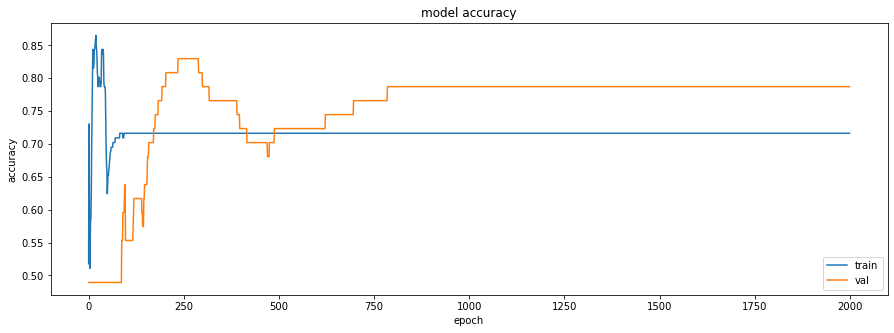

In [37]:
#2048 , 326
plt.figure(figsize=(15,5))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [38]:
y_pred = model1.predict(X_test)
score = model1.evaluate(X_test, y_test, verbose=0)
print("Loss is :", score[0])
print("Accuracy score is : ", score[1])

Loss is : 0.0016657919622957706
Accuracy score is :  0.7234042286872864
